In [1]:
#the library was used for this section of the project.
import json
import requests
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#from config import api_key.
# importing the four reports of the employment number in the manufactor sectors for all four sections in the US. Local, Private,
#federal, and state.
headers = {'Content-type': 'application/json'}
data1 = json.dumps({"seriesid": ['ENUUS0001011013'],"startyear":"2007", "endyear":"2018", "annualaverage":"true", "catalog":"true"})
p1 = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/?registrationkey=5900182bdc014dc09ca2e280d160c89a',
                   data=data1, headers=headers)
json_data1 = json.loads(p1.text)



data2 = json.dumps({"seriesid": ['ENUUS0001021013'],"startyear":"2007", "endyear":"2018", "annualaverage":"true", "catalog":"true"})
p2 = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/?registrationkey=5900182bdc014dc09ca2e280d160c89a', 
                   data=data2, headers=headers)
json_data2 = json.loads(p2.text)



data3 = json.dumps({"seriesid": ['ENUUS0001031013'],"startyear":"2007", "endyear":"2018", "annualaverage":"true", "catalog":"true"})
p3 = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/?registrationkey=5900182bdc014dc09ca2e280d160c89a', 
                   data=data3, headers=headers)
json_data3 = json.loads(p3.text)




data4 = json.dumps({"seriesid": ['ENUUS0001051013'],"startyear":"2007", "endyear":"2018", "annualaverage":"true", "catalog":"true"})
p4 = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/?registrationkey=5900182bdc014dc09ca2e280d160c89a', 
                   data=data4, headers=headers)
json_data4 = json.loads(p4.text)

In [3]:
#Clean the data process starts here. The json file has three elements that is not needed
clean_data1 = json_data1['Results']['series'][0]['data']
clean_data2 = json_data2['Results']['series'][0]['data']
clean_data3 = json_data3['Results']['series'][0]['data']
clean_data4 = json_data4['Results']['series'][0]['data']

In [4]:
#The next four loops are going to extract the data from the json file into DataFrames.
#after that, change the column data type into numeric so it can graphed
year1 = []
periodName1 = []
value1 = []
for x in range(len(clean_data1)):
    y = clean_data1[x]['year']
    p = clean_data1[x]['periodName']
    if p=="Annual":
            v = clean_data1[x]['value']
            year1.append(y)
            periodName1.append(p)
            value1.append(v)
data_df1 = pd.DataFrame({"Year": year1,"period Name": periodName1, "Value": value1})
data_df1 = data_df1.astype({"Year": "int64", "Value": "float64"}, copy=False, errors="ignore")

In [5]:
year2 = []
periodName2 = []
value2 = []
for x in range(len(clean_data2)):
    y = clean_data2[x]['year']
    p = clean_data2[x]['periodName']
    if p=="Annual":
            v = clean_data2[x]['value']
            year2.append(y)
            periodName2.append(p)
            value2.append(v)
data_df2 = pd.DataFrame({"Year": year2,"period Name": periodName2, "Value": value2})
data_df2 = data_df2.astype({"Year": "int64", "Value": "float64"}, copy=False, errors="ignore")

In [6]:
year3 = []
periodName3 = []
value3 = []
for x in range(len(clean_data3)):
    y = clean_data3[x]['year']
    p = clean_data3[x]['periodName']
    if p=="Annual":
            v = clean_data3[x]['value']
            year3.append(y)
            periodName3.append(p)
            value3.append(v)
data_df3 = pd.DataFrame({"Year": year3,"period Name": periodName3, "Value": value3})
data_df3 = data_df3.astype({"Year": "int64", "Value": "float64"}, copy=False, errors="ignore")

In [7]:
year4 = []
periodName4 = []
value4 = []
for x in range(len(clean_data4)):
    y = clean_data4[x]['year']
    p = clean_data4[x]['periodName']
    if p=="Annual":
            v = clean_data4[x]['value']
            year4.append(y)
            periodName4.append(p)
            value4.append(v)
data_df4 = pd.DataFrame({"Year": year4,"period Name": periodName4, "Value": value4})
data_df4 = data_df4.astype({"Year": "int64", "Value": "float64"}, copy=False, errors="ignore")

In [8]:
#merging all the Dataframes together
merge_df1a2 = pd.merge(data_df1, data_df2, on="Year", suffixes=("_rep1", "_rep2"))
merge_df1a2a3 = pd.merge(merge_df1a2, data_df3, on="Year" )
merge_df = pd.merge(merge_df1a2a3, data_df4, on="Year")

In [9]:
#sumation of all the employment numbers
merge_df = pd.DataFrame({"Year": merge_df["Year"],
                         "Total Number of Employment": ((merge_df["Value_rep1"]+ merge_df["Value_rep2"] + merge_df["Value_x"] +merge_df["Value_y"])/1000000)})
final_df = pd.DataFrame(merge_df)

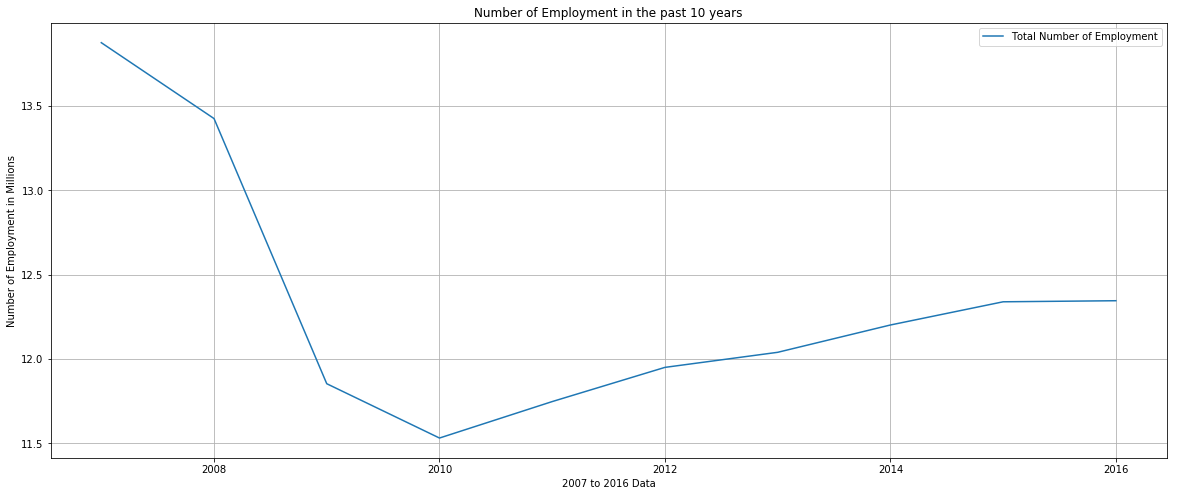

In [10]:
#Number of employees in the Manufacture sector
plt.figure(figsize=(20,8))
plt.plot(final_df["Year"], final_df["Total Number of Employment"])
plt.xlabel("2007 to 2016 Data")
plt.ylabel("Number of Employment in Millions")
plt.title("Number of Employment in the past 10 years")
plt.legend(loc="best")
plt.grid()
plt.savefig("Images/Numberofemployees.png")
plt.show()

In [11]:
#started the process to calc the average # of employment
d = final_df.sort_values("Year", ascending=True)
d_new = d.reset_index(drop=True)

In [12]:
a = pd.Series(d_new["Total Number of Employment"])
avege_chage = a.pct_change()

In [13]:
new_df = pd.DataFrame({"Year": d_new["Year"],
                       "Average Number of Employment": avege_chage})

In [14]:
new_df

,Year,Average Number of Employment
0,2007,NaN
1,2008,-0.032408
2,2009,-0.117051
3,2010,-0.027154
4,2011,0.018739
5,2012,0.017249
6,2013,0.007471
7,2014,0.013444
8,2015,0.011270
9,2016,0.000513


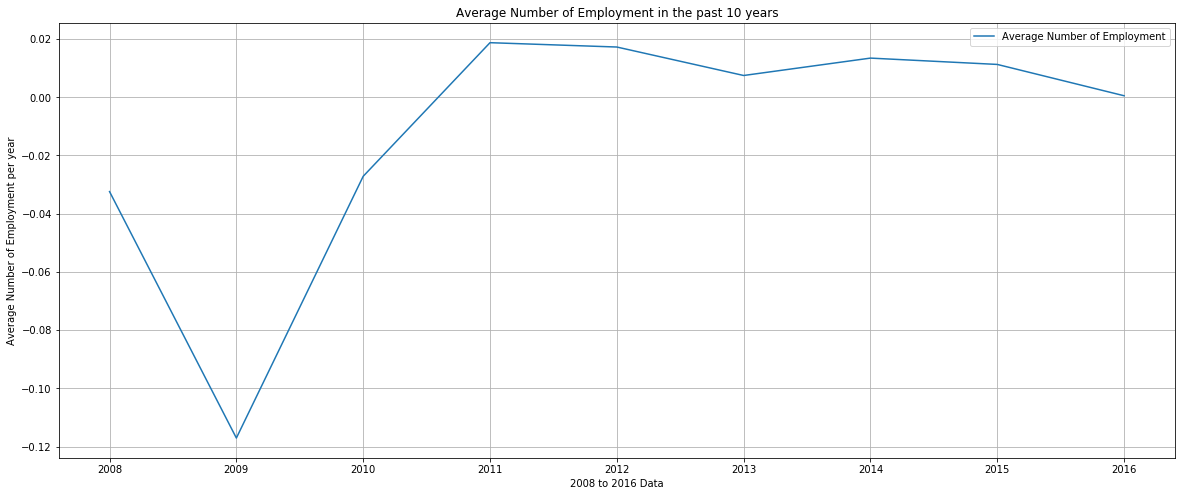

In [15]:
#Average change of employees in the Manufacture sector
plt.figure(figsize=(20,8))
plt.plot(new_df["Year"], new_df["Average Number of Employment"])
plt.xlabel("2008 to 2016 Data")
plt.ylabel("Average Number of Employment per year")
plt.title("Average Number of Employment in the past 10 years")
plt.legend(loc="best")
plt.grid()
plt.savefig("Images/AvgNumberofemployees.png")
plt.show()

In [16]:
#number of industrila robots sold to the US.
file = "Resources/GrossOutputMan.csv"
report = pd.read_csv(file)
report["Gross Output Average"] = pd.Series(report["Gross Manufacture Output"]).pct_change()
report

,Year,Gross Manufacture Output,Gross Output Average
0,2008,5493.7,NaN
1,2009,4511.1,-0.178859
2,2010,5019.1,0.112611
3,2011,5592.9,0.114323
4,2012,5771.3,0.031898
5,2013,5939.3,0.029110
6,2014,6039.6,0.016888
7,2015,5714.7,-0.053795
8,2016,5573.0,-0.024796
9,2017,5889.5,0.056792


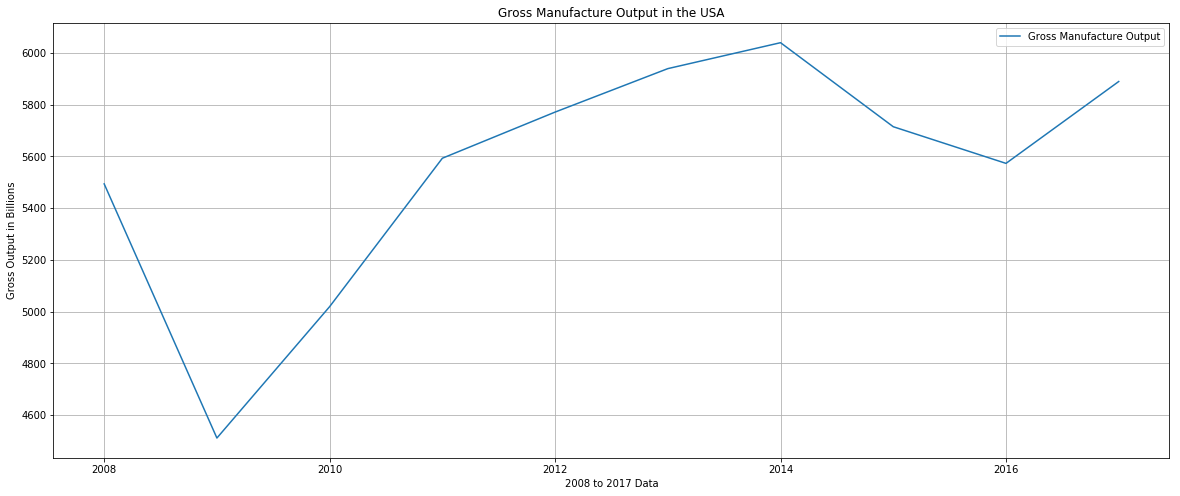

In [17]:
#Gross manufacture Output in the USA
plt.figure(figsize=(20,8))
plt.plot(report["Year"], report["Gross Manufacture Output"])
plt.xlabel("2008 to 2017 Data")
plt.ylabel("Gross Output in Billions")
plt.title("Gross Manufacture Output in the USA")
plt.legend(loc="best")
plt.grid()
plt.savefig("Images/GrossManufactureOutput.png")
plt.show()

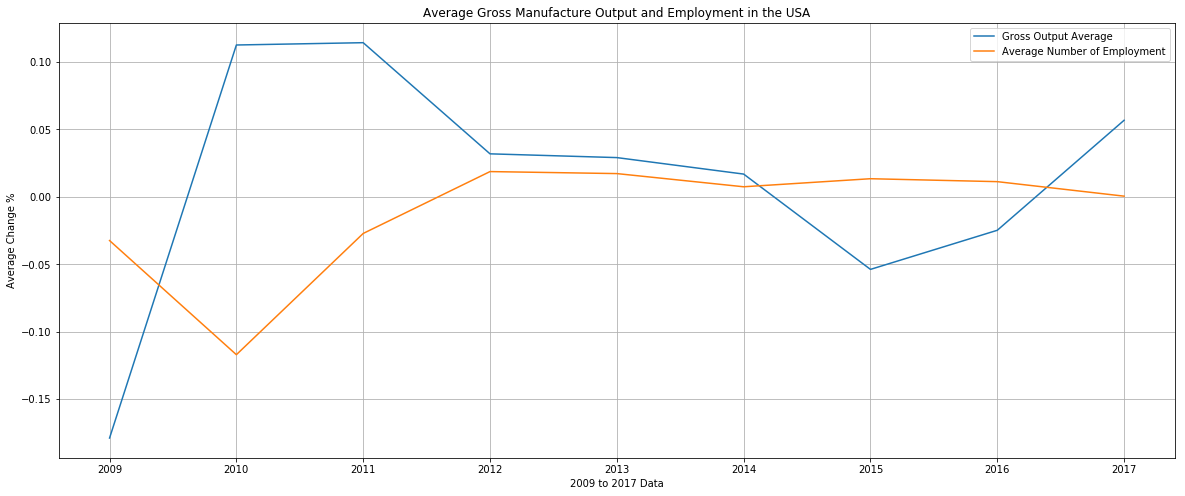

In [18]:
#Average Gross manufacture Output in the USA and Average Employees 
plt.figure(figsize=(20,8))
plt.plot(report["Year"], report["Gross Output Average"])
plt.plot(report["Year"],new_df["Average Number of Employment"] )
plt.xlabel("2009 to 2017 Data")
plt.ylabel("Average Change %")
plt.title("Average Gross Manufacture Output and Employment in the USA")
plt.legend(loc="best")
plt.grid()
plt.savefig("Images/AvgGrossManufactureOutput&EmpNum.png")


In [19]:
#top five countries in robots sales.
top_sales = pd.read_csv('Resources/Top6CountriesinRoboSales.csv')
top_sales

,Country,Robots Sales (Unites)
0,China,138000
1,Japan,45566
2,Republic of Korea,39732
3,United States,33192
4,Germany,21404


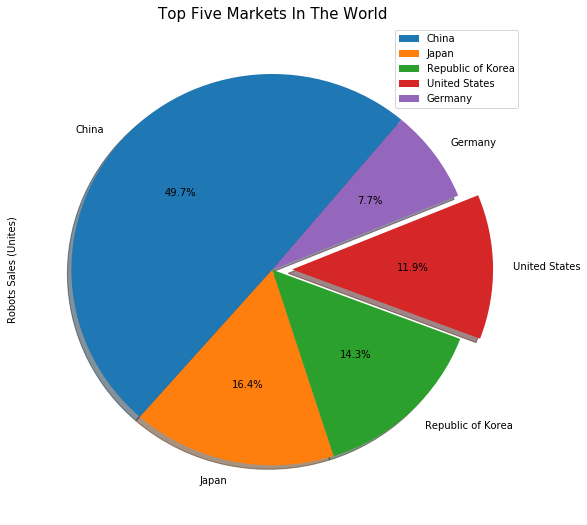

In [20]:
explode = (0,0,0,0.099,0)
top_sales.plot.pie(labels=["China","Japan","Republic of Korea","United States","Germany"], y="Robots Sales (Unites)", autopct="%1.1f%%", figsize=(9, 9), explode=explode, shadow=True, startangle=50)
plt.title("Top Five Markets In The World", fontsize=15)
plt.legend(loc="best")
plt.savefig("Images/topPie.png")


In [21]:
#industrial Robots sales in the USA.
usa_sales = pd.read_csv('Resources/RobotsSalesUSA.csv')
usa_sales["Average # of Unites Sold to the US Manufacture"] = pd.Series(usa_sales["# of Unites Sold to the USA Manufacture"]).pct_change()
usa_sales

,Year,# of Unites Sold to the USA Manufacture,Average # of Unites Sold to the US Manufacture
0,2009,9000,NaN
1,2010,13310,0.478889
2,2011,18260,0.371901
3,2012,17490,-0.042169
4,2013,19580,0.119497
5,2014,24310,0.241573
6,2015,27940,0.149321
7,2016,32340,0.157480
8,2017,41910,0.295918
9,2018,46310,0.104987


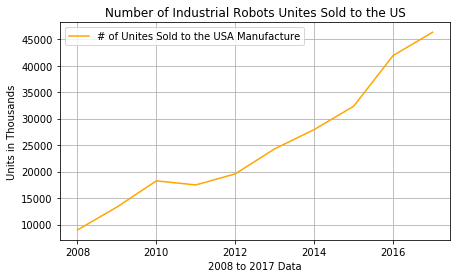

In [26]:
plt.figure(figsize=(7,4))
#plt.plot(report["Year"], report["Gross Output Average"])
#plt.plot(report["Year"],new_df["Average Number of Employment"] )
plt.plot(report["Year"],usa_sales["# of Unites Sold to the USA Manufacture"], color="Orange")
plt.xlabel("2008 to 2017 Data")
plt.ylabel("Units in Thousands")
plt.title("Number of Industrial Robots Unites Sold to the US")
plt.legend(loc="best")
plt.grid()
plt.savefig("Images/UnitesSoldtoTheUSA.png")

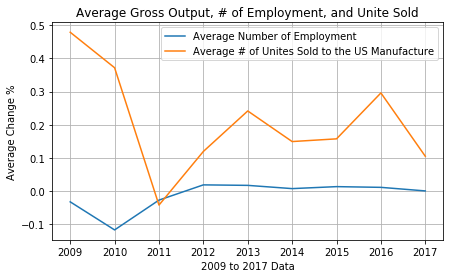

In [22]:
plt.figure(figsize=(7,4))
#plt.plot(report["Year"], report["Gross Output Average"])
plt.plot(report["Year"],new_df["Average Number of Employment"] )
plt.plot(report["Year"],usa_sales["Average # of Unites Sold to the US Manufacture"])
plt.xlabel("2009 to 2017 Data")
plt.ylabel("Average Change %")
plt.title("Average Gross Output, # of Employment, and Unite Sold")
plt.legend(loc="best")
plt.grid()
plt.savefig("Images/AvgUnitesSold.png")


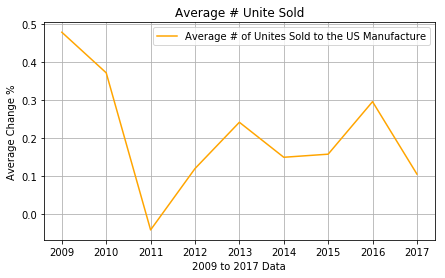

In [59]:
plt.figure(figsize=(7,4))
plt.plot(report["Year"],usa_sales["Average # of Unites Sold to the US Manufacture"], color='orange')
plt.xlabel("2009 to 2017 Data")
plt.ylabel("Average Change %")
plt.title("Average # Unite Sold")
plt.legend(loc="best")
plt.grid()
plt.savefig("Images/AvgUnitesSoldfinal.png")